<h2>Step 1: Load the dataset<h2>

In [2]:
# Necessary packages are imported.

# Importing pandas library to work with the datasets.
import json
import pandas as pd
import numpy as np
import regex as re
import seaborn as sns
import plotly.io as pio
import geopandas as gpd
import plotly.express as px
import matplotlib as mpl
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline
import warnings
warnings.filterwarnings('ignore') 
import matplotlib.ticker as mtick
from matplotlib.ticker import MaxNLocator
pio.renderers.default = "vscode"

In [72]:
# read csv file and convert into a dataframe object 
MedicalData3 = pd.DataFrame(pd.read_csv("MedicalData2.csv", index_col=0)) 

MedicalData3 = MedicalData3.reset_index()
  
# show the dataframe 
MedicalData3.head(10)

,GlobalRecordId,DateofBirth,Age,Gender,Nationality,Address,MaritalStatus,Occupation,PhysicalActivity,AbdominalFatness,...,RectalBleeding,weightloss,Aneamia,Changeofbowelhabit,Appititeloss,Fullness,AbdominalPain,Abdominaladistention,GeneralizedFatigability,N9UnKnowncomplains
0,20c466aa-7b12-408e-9510-2deecd39544d,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,...,False,False,False,False,False,False,False,False,False,False
1,3d5a3f8f-a42a-42a1-89cc-580585e46ce5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,...,False,False,False,False,False,False,False,False,False,False
2,4fd36846-c669-4cf6-b11d-43a1f39bdabd,01-Jan-38,69.0,1- Male,1- Libyan,NaN,NaN,NaN,NaN,False,...,False,False,False,False,False,False,False,False,False,False
3,606742fc-d78c-4768-b561-ed4da010d19a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,...,False,False,False,False,False,False,False,False,False,False
4,65cd177e-1812-446b-b7ff-1d557ca9efea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,...,False,False,False,False,False,False,False,False,False,False
5,d2c992a7-f4e5-49e3-9e71-d4d34e60ad2b,01-Jan-62,45.0,2- Female,1- Libyan,NaN,NaN,NaN,NaN,False,...,False,False,False,False,False,False,False,False,False,False
6,e7f33262-7afd-42f5-ac1d-ee2085b66176,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,...,False,False,False,False,False,False,False,False,False,False
7,f59cb48d-ba20-4ac1-b805-6fd79c80d4b2,NaN,35.0,NaN,NaN,NaN,2- Married,5- House Wife,9- UnKnown,False,...,True,False,False,True,False,False,True,False,False,False
8,4b09dee6-ab27-460b-beb5-9710e0ced14f,01-Jan-54,53.0,2- Female,1- Libyan,Agelat,NaN,NaN,NaN,False,...,False,False,False,False,False,False,False,False,False,False
9,a954580a-247e-4f06-8948-3345f33f449f,01-Jan-42,65.0,1- Male,1- Libyan,Agelat,2- Married,3- Employee,1- physically active,False,...,True,False,False,True,False,True,False,False,False,False


In [73]:
MedicalData3.shape

(218, 29)

<h2>Step 2: Select features<h2>

In [74]:
MedicalData3.columns

Index(['GlobalRecordId', 'DateofBirth', 'Age', 'Gender', 'Nationality',
       'Address', 'MaritalStatus', 'Occupation', 'PhysicalActivity',
       'AbdominalFatness', 'Smoking', 'Durationofsmoking', 'Unit',
       'N9UnKnownlifestyle', 'AlcoholDrinks', 'DioxinExposure', 'Yes',
       'Nofamilyhistory', 'Colorectalcancer', 'RectalBleeding', 'weightloss',
       'Aneamia', 'Changeofbowelhabit', 'Appititeloss', 'Fullness',
       'AbdominalPain', 'Abdominaladistention', 'GeneralizedFatigability',
       'N9UnKnowncomplains'],
      dtype='object')

In [75]:
MedicalData3.dtypes

GlobalRecordId              object
DateofBirth                 object
Age                        float64
Gender                      object
Nationality                 object
Address                     object
MaritalStatus               object
Occupation                  object
PhysicalActivity            object
AbdominalFatness              bool
Smoking                     object
Durationofsmoking          float64
Unit                        object
N9UnKnownlifestyle            bool
AlcoholDrinks               object
DioxinExposure              object
Yes                           bool
Nofamilyhistory               bool
Colorectalcancer              bool
RectalBleeding                bool
weightloss                    bool
Aneamia                       bool
Changeofbowelhabit            bool
Appititeloss                  bool
Fullness                      bool
AbdominalPain                 bool
Abdominaladistention          bool
GeneralizedFatigability       bool
N9UnKnowncomplains  

In [76]:
# Drop all unnecessary columns.

MedicalData3 = MedicalData3.drop(['GlobalRecordId', 'DateofBirth', 'N9UnKnowncomplains', 'Yes', 'N9UnKnownlifestyle', 'Unit'],  axis='columns')

In [77]:
# Count all NaN values in each column.

MedicalData3.isna().sum()

Age                          9
Gender                       7
Nationality                  7
Address                      8
MaritalStatus               72
Occupation                  73
PhysicalActivity            75
AbdominalFatness             0
Smoking                     78
Durationofsmoking          205
AlcoholDrinks               78
DioxinExposure              80
Nofamilyhistory              0
Colorectalcancer             0
RectalBleeding               0
weightloss                   0
Aneamia                      0
Changeofbowelhabit           0
Appititeloss                 0
Fullness                     0
AbdominalPain                0
Abdominaladistention         0
GeneralizedFatigability      0
dtype: int64

In [87]:
MedicalData3 = MedicalData3.loc[MedicalData3.Gender.notna(), ['Age', 'Gender', 
     'PhysicalActivity', 'AbdominalFatness', 'Smoking',
        'AlcoholDrinks', 'DioxinExposure',
       'Nofamilyhistory', 'Colorectalcancer', 'RectalBleeding', 'weightloss',
       'Aneamia', 'Changeofbowelhabit', 'Appititeloss', 'Fullness',
       'AbdominalPain', 'Abdominaladistention', 'GeneralizedFatigability']]

In [89]:
MedicalData3.shape

(127, 18)

In [109]:
MedicalData3.isna().sum()

Age                        0
Gender                     0
PhysicalActivity           0
AbdominalFatness           0
Smoking                    0
AlcoholDrinks              0
DioxinExposure             0
Nofamilyhistory            0
Colorectalcancer           0
RectalBleeding             0
weightloss                 0
Aneamia                    0
Changeofbowelhabit         0
Appititeloss               0
Fullness                   0
AbdominalPain              0
Abdominaladistention       0
GeneralizedFatigability    0
dtype: int64

In [110]:
MedicalData3.head()

,Age,Gender,PhysicalActivity,AbdominalFatness,Smoking,AlcoholDrinks,DioxinExposure,Nofamilyhistory,Colorectalcancer,RectalBleeding,weightloss,Aneamia,Changeofbowelhabit,Appititeloss,Fullness,AbdominalPain,Abdominaladistention,GeneralizedFatigability
9,65.0,1- Male,1- physically active,False,0- No,0- No,9- UnKnown,True,False,True,False,False,True,False,True,False,False,False
12,57.0,2- Female,0- Not physically active,False,0- No,0- No,0- No,False,False,True,True,True,True,True,False,False,False,False
13,52.0,2- Female,9- UnKnown,False,9- UnKnown,0- No,9- UnKnown,True,False,True,False,True,True,False,False,False,False,False
14,72.0,2- Female,9- UnKnown,False,9- UnKnown,9- UnKnown,9- UnKnown,True,False,False,False,False,False,False,False,False,False,False
15,60.0,1- Male,9- UnKnown,False,9- UnKnown,9- UnKnown,9- UnKnown,False,False,False,False,False,False,False,False,False,False,False


<h2> Step 3: Encode categorical features<h2>

In [124]:
# dummy encoding of categorical features

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import Normalizer
from sklearn.compose import ColumnTransformer


In [45]:
MedicalData3.columns

Index(['Age', 'Gender', 'PhysicalActivity', 'AbdominalFatness', 'Smoking',
       'AlcoholDrinks', 'DioxinExposure', 'Nofamilyhistory',
       'Colorectalcancer', 'RectalBleeding', 'weightloss', 'Aneamia',
       'Changeofbowelhabit', 'Appititeloss', 'Fullness', 'AbdominalPain',
       'Abdominaladistention', 'GeneralizedFatigability'],
      dtype='object')

In [44]:
MedicalData3.dtypes

Age                        float64
Gender                      object
PhysicalActivity            object
AbdominalFatness              bool
Smoking                     object
AlcoholDrinks               object
DioxinExposure              object
Nofamilyhistory               bool
Colorectalcancer              bool
RectalBleeding                bool
weightloss                    bool
Aneamia                       bool
Changeofbowelhabit            bool
Appititeloss                  bool
Fullness                      bool
AbdominalPain                 bool
Abdominaladistention          bool
GeneralizedFatigability       bool
dtype: object

In [130]:
column_trans = make_column_transformer(
    (OneHotEncoder(), [ 'Gender', 'PhysicalActivity', 'AbdominalFatness', 'Smoking',
       'AlcoholDrinks', 'DioxinExposure', 'Nofamilyhistory',
       'Colorectalcancer', 'RectalBleeding', 'weightloss', 'Aneamia',
       'Changeofbowelhabit', 'Appititeloss', 'Fullness', 'AbdominalPain',
       'Abdominaladistention', 'GeneralizedFatigability']),
    remainder='passthrough')

In [131]:
x = column_trans.fit_transform(MedicalData3)

In [132]:
column_trans.fit_transform(MedicalData3).shape

(127, 40)

In [136]:
# All column names after Onehotencoding

column_trans.get_feature_names_out(input_features=None)

array(['onehotencoder__Gender_1- Male', 'onehotencoder__Gender_2- Female',
       'onehotencoder__PhysicalActivity_0- Not physically active',
       'onehotencoder__PhysicalActivity_1- physically active',
       'onehotencoder__PhysicalActivity_9- UnKnown',
       'onehotencoder__AbdominalFatness_False',
       'onehotencoder__AbdominalFatness_True',
       'onehotencoder__Smoking_0- No', 'onehotencoder__Smoking_1- Yes',
       'onehotencoder__Smoking_2- Quet',
       'onehotencoder__Smoking_9- UnKnown',
       'onehotencoder__AlcoholDrinks_0- No',
       'onehotencoder__AlcoholDrinks_1- Yes',
       'onehotencoder__AlcoholDrinks_2- Quet',
       'onehotencoder__AlcoholDrinks_9- UnKnown',
       'onehotencoder__DioxinExposure_0- No',
       'onehotencoder__DioxinExposure_9- UnKnown',
       'onehotencoder__Nofamilyhistory_False',
       'onehotencoder__Nofamilyhistory_True',
       'onehotencoder__Colorectalcancer_False',
       'onehotencoder__Colorectalcancer_True',
       'onehotenc

<h2> Step 3: Finding correlation in data without applying Normilizer().

In [116]:
# Correlation without applying normalizer.

z = pd.DataFrame(x).corr(method='pearson')
z.head()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,1.000000,-1.000000,0.016773,0.028330,-0.033190,0.112399,-0.112399,-0.637584,0.342668,0.231717,...,-0.159246,-0.070610,0.070610,-0.017337,0.017337,-0.005767,0.005767,-0.024013,0.024013,0.040748
1,-1.000000,1.000000,-0.016773,-0.028330,0.033190,-0.112399,0.112399,0.637584,-0.342668,-0.231717,...,0.159246,0.070610,-0.070610,0.017337,-0.017337,0.005767,-0.005767,0.024013,-0.024013,-0.040748
2,0.016773,-0.016773,1.000000,-0.107397,-0.213630,0.013857,-0.013857,0.084112,0.075092,-0.045473,...,0.118519,0.013857,-0.013857,0.014313,-0.014313,0.040329,-0.040329,0.034636,-0.034636,0.093186
3,0.028330,-0.028330,-0.107397,1.000000,-0.948321,0.061512,-0.061512,0.052747,0.025119,0.110777,...,0.211291,-0.129024,0.129024,-0.364822,0.364822,-0.236881,0.236881,-0.163754,0.163754,0.021568
4,-0.033190,0.033190,-0.213630,-0.948321,1.000000,-0.064864,0.064864,-0.078675,-0.048648,-0.094336,...,-0.245441,0.122357,-0.122357,0.353905,-0.353905,0.219887,-0.219887,0.149850,-0.149850,-0.050933


<Axes: >

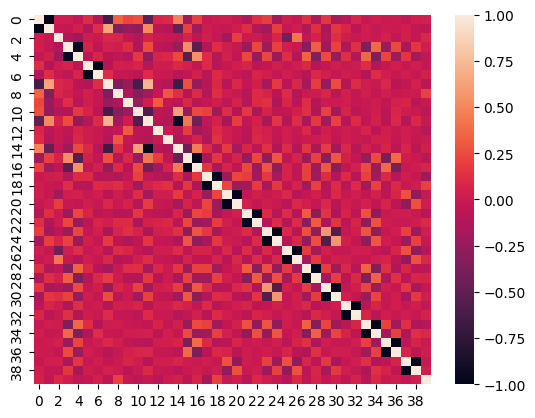

In [135]:
sns.heatmap(z)

<h2> Step 4: Finding correlation in data with Normilizer().

In [139]:
y = column_trans.fit_transform(MedicalData3)
y = Normalizer().fit_transform(y)

In [140]:
y = pd.DataFrame(y).corr(method='pearson')
y.head()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,1.000000,-0.845243,-0.036493,0.057386,0.074521,0.231313,-0.103090,-0.565997,0.269170,0.213941,...,-0.141866,0.198226,0.035988,0.056076,0.066025,0.205667,-0.045640,0.147262,0.051524,-0.180716
1,-0.845243,1.000000,-0.013033,0.048629,0.145982,0.308449,0.073103,0.727191,-0.304043,-0.211012,...,0.117745,0.341295,-0.065072,0.177057,0.007365,0.182205,0.123913,0.310895,-0.058299,-0.363978
2,-0.036493,-0.013033,1.000000,-0.100091,-0.189997,-0.081147,-0.013771,0.039692,0.064335,-0.044655,...,0.135597,-0.081277,-0.013771,-0.001489,-0.050452,-0.043402,-0.037327,-0.053122,-0.033698,0.082037
3,0.057386,0.048629,-0.100091,1.000000,-0.795884,0.195989,-0.057685,0.122688,-0.036677,0.101174,...,0.210366,0.161518,0.088716,-0.296104,0.436204,-0.075086,0.312554,0.109485,0.081693,-0.195450
4,0.074521,0.145982,-0.189997,-0.795884,1.000000,0.374485,0.030088,0.061288,-0.026419,-0.088092,...,-0.245212,0.407367,-0.109500,0.507446,-0.319686,0.463713,-0.199373,0.368579,-0.076392,-0.382063


<Axes: >

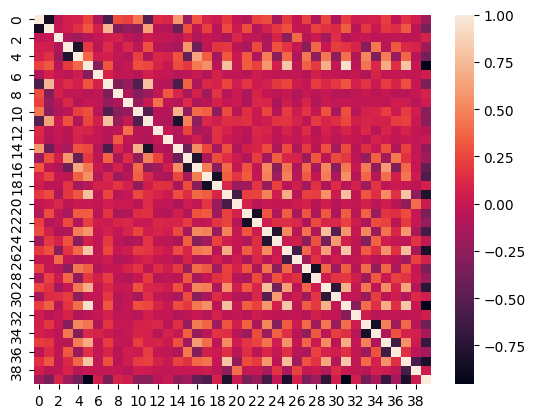

In [141]:
sns.heatmap(y)

<h2> Step 5: Finding correlation between Colorectal cancer signs and symptoms <h2>

In [142]:
Signs = MedicalData3[['Colorectalcancer', 'RectalBleeding', 'weightloss', 'Aneamia','Changeofbowelhabit', 'Appititeloss', 'Fullness', 'AbdominalPain',
       'Abdominaladistention', 'GeneralizedFatigability']]

In [143]:
Signs.isna().sum()

Colorectalcancer           0
RectalBleeding             0
weightloss                 0
Aneamia                    0
Changeofbowelhabit         0
Appititeloss               0
Fullness                   0
AbdominalPain              0
Abdominaladistention       0
GeneralizedFatigability    0
dtype: int64

In [144]:
Signs.shape

(127, 10)

In [145]:
column_trans = make_column_transformer(
    (OneHotEncoder(), ['Colorectalcancer', 'RectalBleeding', 'weightloss', 'Aneamia',
       'Changeofbowelhabit', 'Appititeloss', 'Fullness', 'AbdominalPain',
       'Abdominaladistention', 'GeneralizedFatigability']),
    remainder='passthrough')

In [146]:
x = column_trans.fit_transform(Signs)

In [147]:
z = pd.DataFrame(x).corr(method='pearson')
z.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1.000000,-1.000000,-0.037488,0.037488,-0.009696,0.009696,0.092857,-0.092857,-0.032603,0.032603,-0.081560,0.081560,-0.021517,0.021517,-0.045945,0.045945,-0.062622,0.062622,0.271474,-0.271474
1,-1.000000,1.000000,0.037488,-0.037488,0.009696,-0.009696,-0.092857,0.092857,0.032603,-0.032603,0.081560,-0.081560,0.021517,-0.021517,0.045945,-0.045945,0.062622,-0.062622,-0.271474,0.271474
2,-0.037488,0.037488,1.000000,-1.000000,0.094303,-0.094303,0.106784,-0.106784,0.306958,-0.306958,0.141544,-0.141544,0.065995,-0.065995,0.271878,-0.271878,-0.011204,0.011204,0.009775,-0.009775
3,0.037488,-0.037488,-1.000000,1.000000,-0.094303,0.094303,-0.106784,0.106784,-0.306958,0.306958,-0.141544,0.141544,-0.065995,0.065995,-0.271878,0.271878,0.011204,-0.011204,-0.009775,0.009775
4,-0.009696,0.009696,0.094303,-0.094303,1.000000,-1.000000,0.085027,-0.085027,0.262815,-0.262815,0.567140,-0.567140,-0.038516,0.038516,0.287152,-0.287152,-0.023120,0.023120,0.209395,-0.209395


<Axes: >

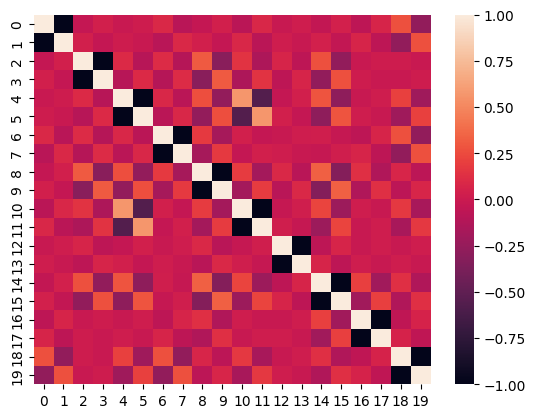

In [148]:
sns.heatmap(z)